In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

#from markov_device import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

In [2]:
def load_simulation(model_name='markov-model1'):
    df1_state1stay=pd.read_csv('../data/%s-state1stay.csv' % (model_name), index_col=0, header=0, low_memory=False)
    df1_state1stay=df1_state1stay.loc[df1_state1stay['received_reward']!='received_reward']
    df1_state1stay['epoch'] = pd.to_numeric(df1_state1stay['epoch'], errors='coerce')
    df1_state1stay['received_reward'] = pd.to_numeric(df1_state1stay['received_reward'], errors='coerce')
    df1_state1stay['state1_stay'] = pd.to_numeric(df1_state1stay['state1_stay'], errors='coerce')
    
    if model_name=='markov-model3':
        df1_state1stay.index = range(len(df1_state1stay))
        df1_state1stay_new = df1_state1stay.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)
        df11_state1stay = df1_state1stay_new.loc[:500000]
        df12_state1stay = df1_state1stay_new.loc[500000:]

    df1 = pd.read_csv('../data/%s-beh.csv' % (model_name), index_col=0, header=0, low_memory=False)
    df1=df1.loc[df1['received_reward']!='received_reward']
    df1['index_bin'] = pd.to_numeric(df1['index_bin'], errors='coerce')
    df1['received_reward'] = pd.to_numeric(df1['received_reward'], errors='coerce')
    df1['optimal_response_sum_prop'] = pd.to_numeric(df1['optimal_response_sum_prop'], errors='coerce')
    df1['received_reward_sum_prop'] = pd.to_numeric(df1['received_reward_sum_prop'], errors='coerce')
    
    if model_name=='markov-model3':
        df1.index = range(len(df1)) 
        df1_new = df1.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)

        df11 = df1_new.loc[:500000]
        df12 = df1_new.loc[500000:]
        return df11,df12, df11_state1stay, df12_state1stay
    
    
    return df1, df1_state1stay

In [3]:
model1 = "markov-model1"
model2 = "markov-model2"
model3 = "markov-model3"
# df1, df2, df3 = try_simulation_example()
df1, df1_state1stay = load_simulation(model1)
df2, df2_state1stay = load_simulation(model2)
df31, df32, df31_state1stay, df32_state1stay = load_simulation(model3)

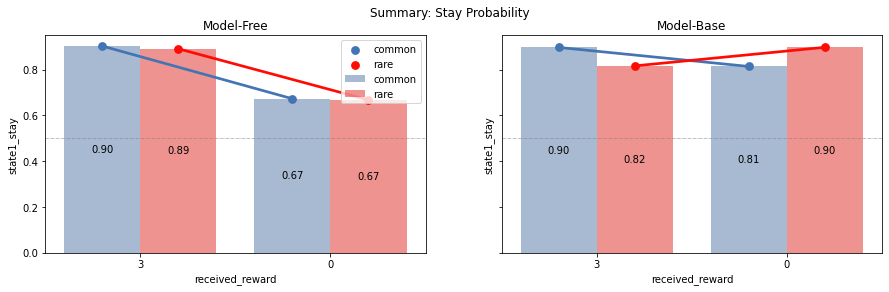

In [4]:
# Create an array with the colors you want to use
my_palette = sns.color_palette(["#4374B3", "#FF0B04"])

fig, axes = plt.subplots(1,2, figsize=(15,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df1_state1stay, x='received_reward', y='state1_stay', 
            hue='state_frequency', 
            palette=my_palette, alpha=.5, 
            order = sorted(df1_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[0]) 
sns.pointplot(data=df1_state1stay, x='received_reward', y='state1_stay', dodge=0.4,
            hue='state_frequency', 
              palette=my_palette, 
            order = sorted(df1_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[0]) 

sns.barplot(data=df2_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df2_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[1]) 
sns.pointplot(data=df2_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df2_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[1])  

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

    

axes[0].legend(loc=1)
axes[1].legend_.remove()
axes[0].set_title('Model-Free')
axes[1].set_title('Model-Base')

plt.show()

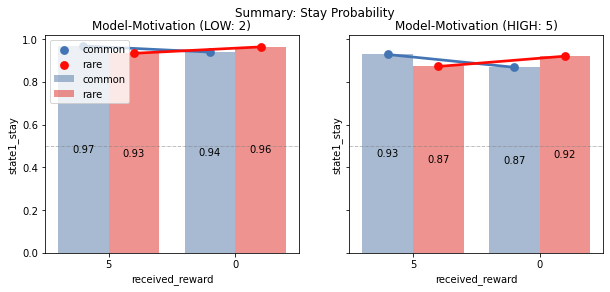

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df31_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df31_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[0]) 
sns.pointplot(data=df31_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df31_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[0]) 

sns.barplot(data=df32_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df32_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[1]) 
sns.pointplot(data=df32_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df32_state1stay['received_reward'].unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[1]) 

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

axes[0].legend(loc=2)
axes[1].legend_.remove() 
axes[0].set_title('Model-Motivation (LOW: %.d)' % (df31['received_reward'].max()))
axes[1].set_title('Model-Motivation (HIGH: %.d)' % (df32['received_reward'].max()))

plt.show()
